In [86]:
#文字雲
import jieba 
from collections import Counter
from PIL import Image # 圖片轉array陣列
import matplotlib.pyplot as plt
import pandas, numpy
import wordcloud #文字雲

import requests
from bs4 import BeautifulSoup
url="https://www.ptt.cc/bbs/Stock/index.html"

r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")
result = soup.select("div.title")

In [87]:
push = []
for i in result:
    href = i.select_one("a")
    if href is None: # 刪文PASS
        pass
    elif '閒聊' in href.text: # 置頂閒聊
        post_url = 'https://www.ptt.cc'+ href.get('href')
        print(post_url)

    r = requests.get(post_url)
    soup = BeautifulSoup(r.text, "lxml")
    results = soup.select('span.article-meta-value')
    main_container = soup.find(id='main-container')
    all_text = main_container.text
    pre_text = all_text.split('--')[0]
    texts = pre_text.split('\n') 
    contents = texts[2:]
    # 內容
    content = '\n'.join(contents)

    push_container = soup.find_all(class_='push')  # 推文內容
    for article in push_container:
        messages = article.find('span', 'f3 push-content').getText()
        push.append(messages)
        print('留言', messages) 

留言 : 猛
留言 : 【央視快評：把“三個堅定不移”落實到疫情防控服
留言 : 務管理細節中】央視新聞發表評論員文章，針對當前
留言 : 國內外疫情形勢，特別是國內本土疫情持續擴大這一
留言 : 複雜嚴峻態勢，黨中央明確要求疫情防控要堅定不移
留言 : 推
留言 : 堅持人民至上、生命至上，堅定不移落實“外防輸入
留言 : 、內防反彈”總策略，堅定不移貫徹“動態清零”總
留言 : 方針。
留言 : https://i.imgur.com/z2bon8b.jpg
留言 : https://i.imgur.com/VwtEHSQ.jpg
留言 : https://i.imgur.com/MgVVEY9.jpg
留言 : https://i.imgur.com/3z1Zi9y.jpg
留言 : https://i.imgur.com/yTHe50Z.jpg
留言 : 翎熹https://www.instagram.
留言 : com/olamolly76/
留言 : TSJ!TSJ!TSJ!
留言 : (╮′皿`)<還我小奶
留言 : 尷尬了
留言 : 一堆散戶都在做空選後崩盤行情。結果被嘎爛。笑死
留言 : 小商人刺客新科議員
留言 : 賀! 26家漲停!!!
留言 : TSJ！！！！！！！！！！
留言 : TSJ!!!!!!!!
留言 : TSJ！TSJ!
留言 : rz有了田慎節就慢了
留言 : 不管大奶小奶，給一些更年輕的好嗎_(:3」∠)_
留言 :  https://i.imgur.com/v4FUhfz.jpg
留言 : 明天萬5
留言 : 名字很長 ___很大很白
留言 : 阿文救我!
留言 : http://i.imgur.com/Ga8TyX5.jpg
留言 : 看她眼神真的怪怪 是不是有吸阿
留言 : 對田慎節有意見 是不是想被O交
留言 : 誰來吹一下鰻魚
留言 : 奈米哥救我
留言 : 三個堅定不移  穩了  繼續清零
留言 : 99鰻魚飯 今天吃了就落賽
留言 : 龍哥救我~~~
留言 : 季線翻揚 上五日https://i.imgur.com/lOz3BXW.jpg
留言 : 元太沒救
留言 : 啊那些舉白紙的怎麽處理？通通抓去做雞精？
留言 : 他當選市議員了吧 超猛
留言 : 全部送去新疆集中營！
留言 : https://i.imgu

Building prefix dict from c:\Users\User\Documents\GitHub\Web_Scraping\Tools\dic_Zh.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.u27e4dffaed7821044ea257980f789e10.cache
Loading model cost 0.242 seconds.
Prefix dict has been built successfully.


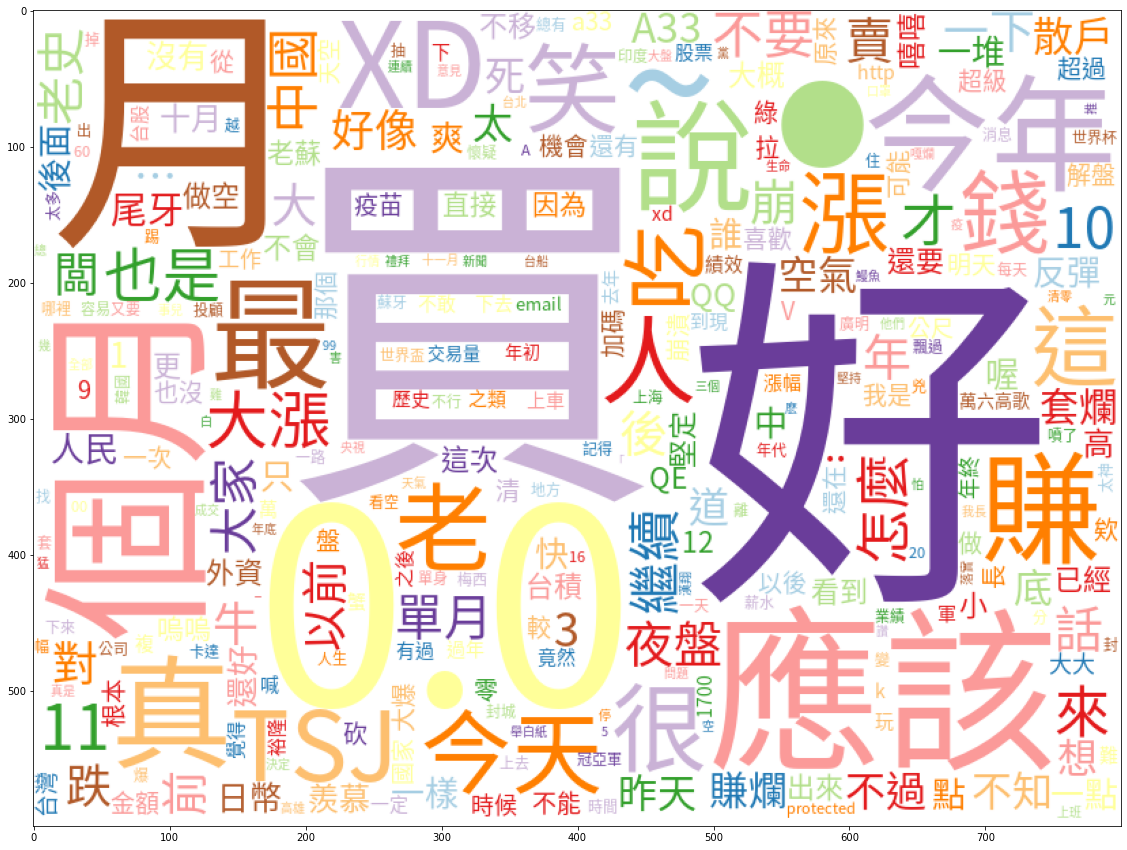

In [92]:
#推文格式調整
push_content = ''.join(push)
push_content = push_content.replace(' ','')

#設定字典及停用詞
jieba.set_dictionary('Tools\dic_Zh.txt')  # 繁體字典
with open('Tools\stops.txt', 'r', encoding='utf8') as f:  # 中文的停用字
    stops = f.read().split('\n') 

#新增停用詞
s = ['嗎','?','!','i','沒','不']
for w in s:
    stops.append(w)

#自訂義辭典
jieba.load_userdict(r'Tools\userDict.txt')

#斷詞
seg_list = jieba.lcut(push_content,cut_all=False)

#刪除停用詞
terms = []
for t in seg_list:
    if  t not in stops:
        terms.append(t)

#統計詞數量
dic = Counter(terms)

#文字雲設定
font_path='Tools\SourceHanSansTW-Regular.otf'

wc = wordcloud.WordCloud(background_color='white',
                         margin=2, # 文字間距
                         #mask=mask,# 遮罩 有用的話則無視設定長寬
                         colormap='Paired',#viridis #顏色主題
                         font_path=font_path,# 設定字體
                         max_words=300, # 取多少文字在裡面
                         width=800, height=600, # 長寬解析度
                         relative_scaling=0.5 # 詞頻與詞大小關聯性
                         )

# 生成文字雲
wc.generate_from_frequencies(dic) # 吃入次數字典資料

# 顯示文字雲
plt.figure(figsize=(20,15))
plt.imshow(wc)
#wc.to_file("wordcloud.jpg")        